In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical/medical_clean.csv')

In [5]:
df.rename(columns = {'Item1':'TimelyA', 'Item2':'TimelyT', 'Item3':'TimelyV', 'Item4':'Reliability', 'Item5': 'Options', 'Item6':'HoT', 'Item7':'Courteous','Item8':'ActiveLis'}, inplace = True)

In [6]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,TimelyA,TimelyT,TimelyV,Reliability,Options,HoT,Courteous,ActiveLis
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [7]:
df = df.drop(['Children', 'Income', 'Marital', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Services', 'TotalCharge', 'Additional_charges', 'BackPain','Anxiety', 'CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job'], axis = 1)

In [8]:
df = df[['Initial_days', 'Age', 'Gender', 'ReAdmis','Doc_visits', 'Initial_admin', 'Overweight', 'Asthma', 'TimelyA', 'TimelyT', 'TimelyV', 'Reliability', 'Options', 'HoT', 'Courteous', 'ActiveLis']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Initial_days   10000 non-null  float64
 1   Age            10000 non-null  int64  
 2   Gender         10000 non-null  object 
 3   ReAdmis        10000 non-null  object 
 4   Doc_visits     10000 non-null  int64  
 5   Initial_admin  10000 non-null  object 
 6   Overweight     10000 non-null  object 
 7   Asthma         10000 non-null  object 
 8   TimelyA        10000 non-null  int64  
 9   TimelyT        10000 non-null  int64  
 10  TimelyV        10000 non-null  int64  
 11  Reliability    10000 non-null  int64  
 12  Options        10000 non-null  int64  
 13  HoT            10000 non-null  int64  
 14  Courteous      10000 non-null  int64  
 15  ActiveLis      10000 non-null  int64  
dtypes: float64(1), int64(10), object(5)
memory usage: 1.2+ MB


In [12]:
df.describe()

,Initial_days,Age,Doc_visits,TimelyA,TimelyT,TimelyV,Reliability,Options,HoT,Courteous,ActiveLis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.455299,53.511700,5.012200,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,26.309341,20.638538,1.045734,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.001981,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.896215,36.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,35.836244,53.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,61.161020,71.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,71.981490,89.000000,9.000000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [14]:
df.corr()

C:\Users\nsgoo\AppData\Local\Temp\ipykernel_2748\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Initial_days,Age,Doc_visits,TimelyA,TimelyT,TimelyV,Reliability,Options,HoT,Courteous,ActiveLis
Initial_days,1.000000,0.016264,-0.006754,-0.022258,-0.007738,-0.010817,-0.011748,0.004132,-0.011752,0.001279,-0.008034
Age,0.016264,1.000000,0.006898,0.005552,0.003967,0.004709,0.003377,-0.008827,-0.002087,0.009423,-0.003367
Doc_visits,-0.006754,0.006898,1.000000,0.003680,0.006024,-0.002718,-0.006538,-0.009434,0.012530,0.008589,0.004571
TimelyA,-0.022258,0.005552,0.003680,1.000000,0.655578,0.579585,-0.004614,-0.000368,0.421233,0.332855,0.278067
TimelyT,-0.007738,0.003967,0.006024,0.655578,1.000000,0.521728,0.003077,-0.010018,0.366075,0.291039,0.242962
TimelyV,-0.010817,0.004709,-0.002718,0.579585,0.521728,1.000000,-0.006324,-0.010496,0.312874,0.252302,0.209498
Reliability,-0.011748,0.003377,-0.006538,-0.004614,0.003077,-0.006324,1.000000,-0.447372,0.235444,0.192223,0.161528
Options,0.004132,-0.008827,-0.009434,-0.000368,-0.010018,-0.010496,-0.447372,1.000000,-0.310154,-0.268186,-0.229557
HoT,-0.011752,-0.002087,0.012530,0.421233,0.366075,0.312874,0.235444,-0.310154,1.000000,0.377368,0.319886
Courteous,0.001279,0.009423,0.008589,0.332855,0.291039,0.252302,0.192223,-0.268186,0.377368,1.000000,0.274499


In [10]:
my_list = df.columns.values.tolist()
my_list

['Initial_days', 'Age', 'Gender', 'ReAdmis', 'Doc_visits', 'Initial_admin', 'Overweight', 'Asthma', 'TimelyA', 'TimelyT', 'TimelyV', 'Reliability', 'Options', 'HoT', 'Courteous', 'ActiveLis']


In [16]:
df.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical_cleaned208_v3.csv')

<Figure size 1000x2000 with 0 Axes>

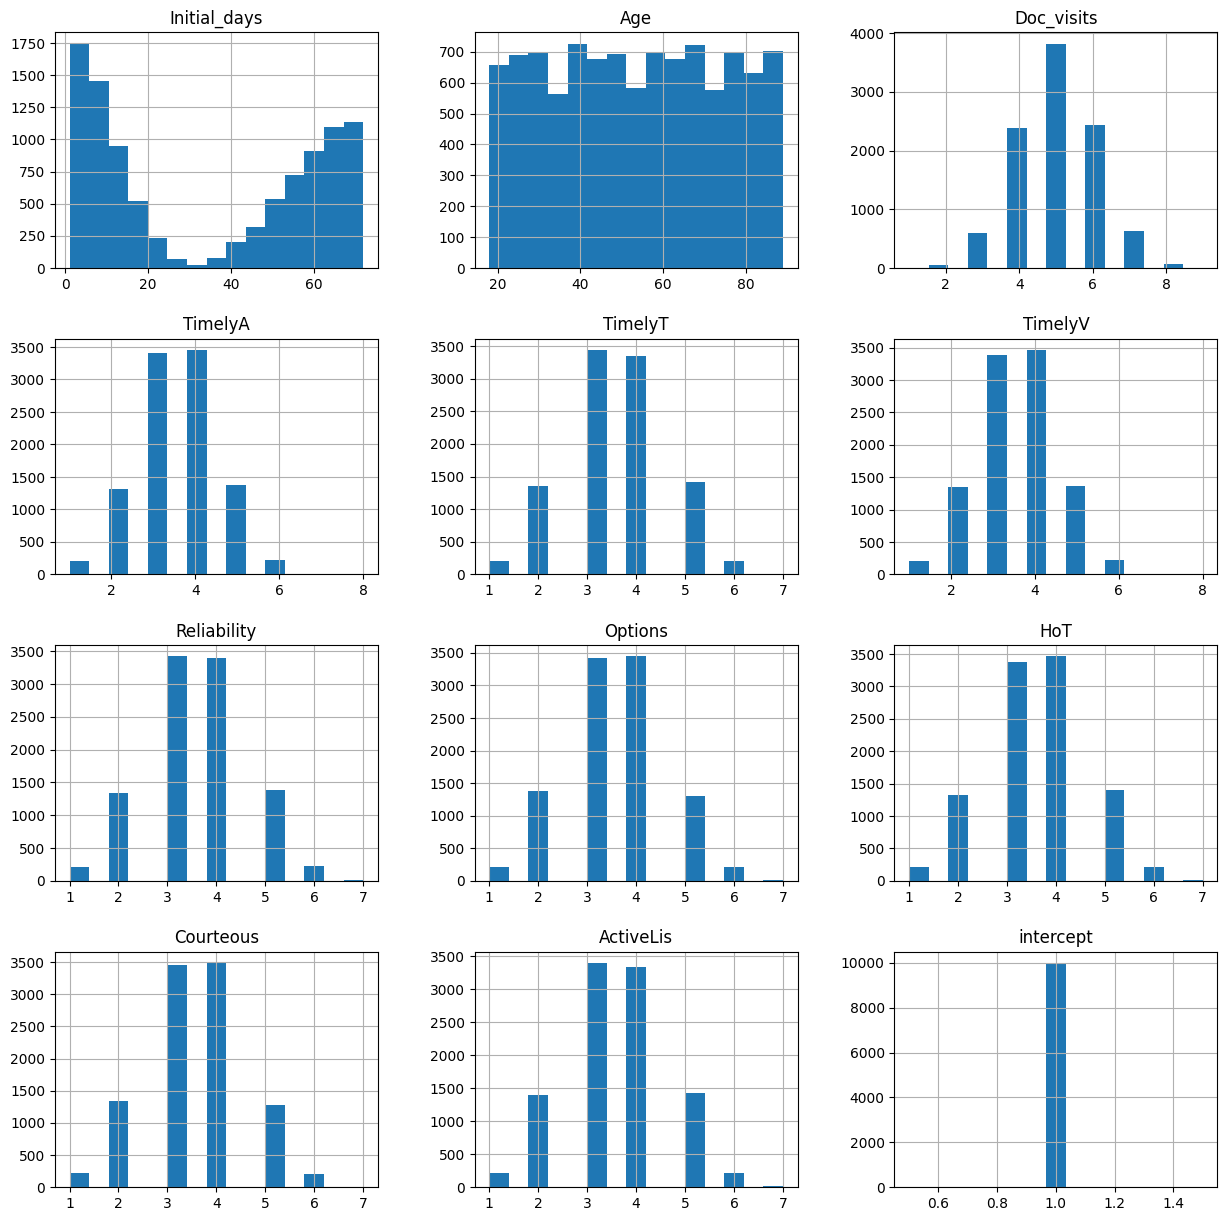

In [31]:
conti_var = df.select_dtypes(include = "number").columns
fig = plt.figure(figsize = (10, 20))
ax = df[conti_var].hist(bins = 15, figsize = (15,15))
fig.tight_layout(h_pad = 5, w_pad = 5)
plt.show()

<AxesSubplot: >

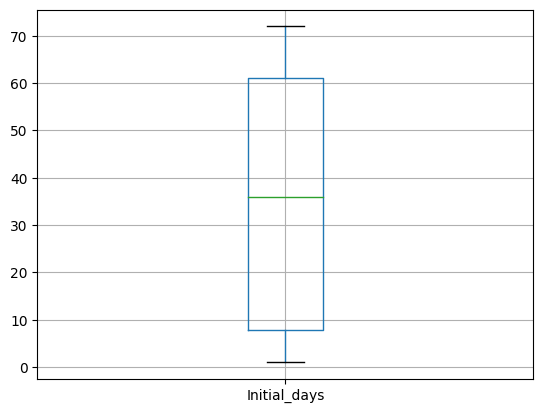

In [18]:
df.boxplot(['Initial_days'])

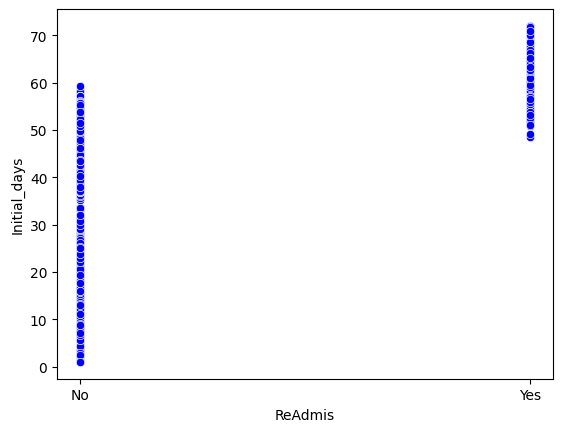

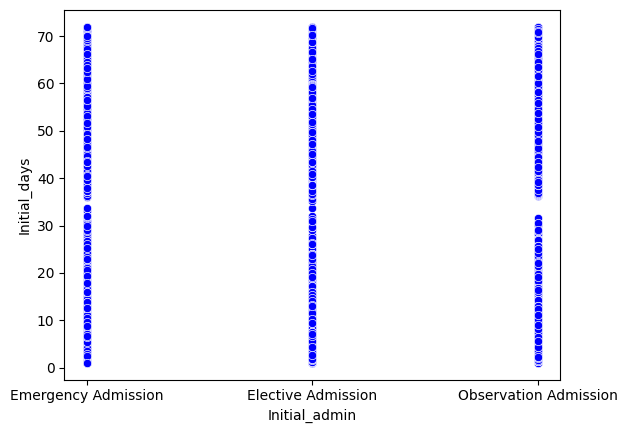

In [35]:
sns.scatterplot(x = df['ReAdmis'],y = df['Initial_days'],color = 'blue')
plt.show()
sns.scatterplot(x = df['Initial_admin'],y = df['Initial_days'],color = 'blue')
plt.show()


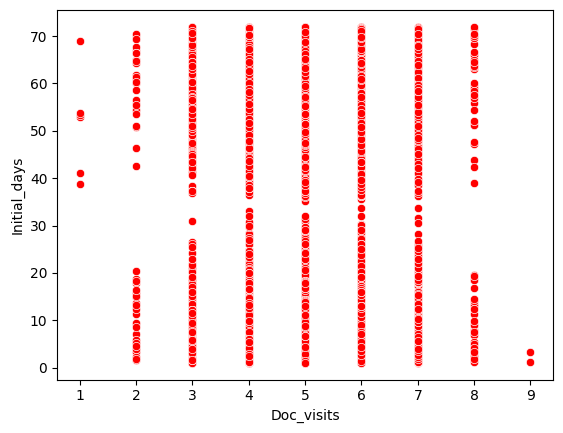

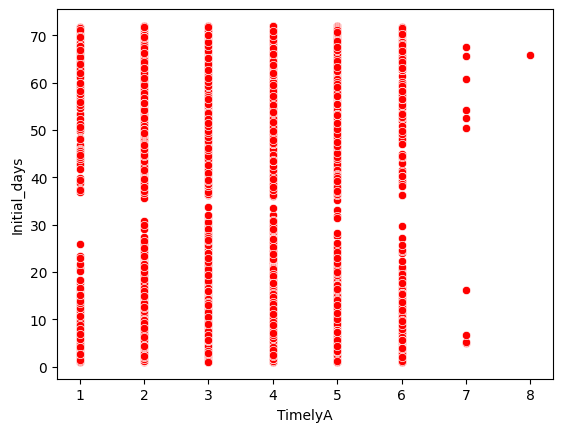

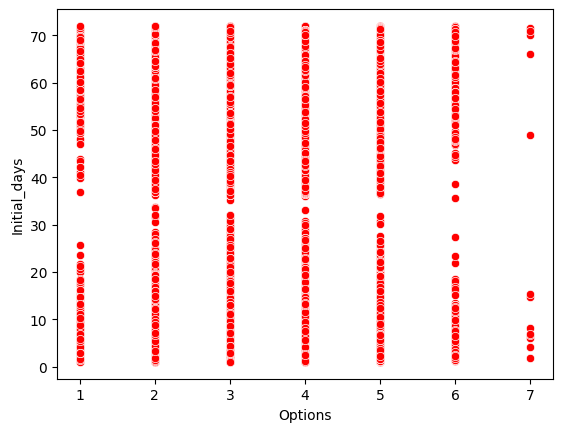

In [34]:
sns.scatterplot(x = df['Doc_visits'],y = df['Initial_days'],color = 'red')
plt.show()
sns.scatterplot(x = df['TimelyA'],y = df['Initial_days'],color = 'red')
plt.show()
sns.scatterplot(x = df['Options'],y = df['Initial_days'],color = 'red')
plt.show()

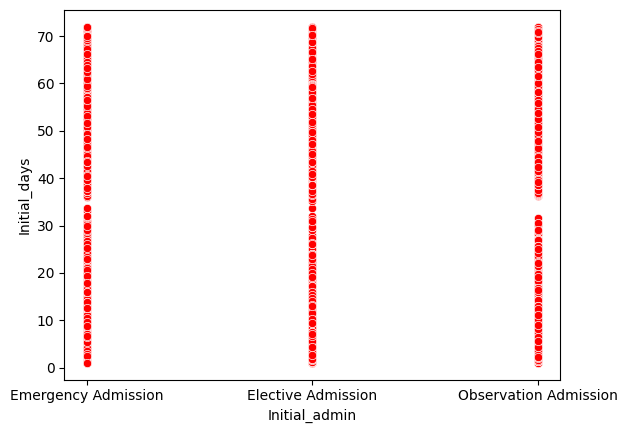

In [70]:
df = df.replace(to_replace = ['Yes','No'],value = [1,0])
df['Initial_admin'] = df['Initial_admin'].replace(['Elective Admission','Observation Admission','Emergency Admission'],[1,2,3])
df


,Initial_days,Age,Gender,ReAdmis,Doc_visits,Initial_admin,Overweight,Asthma,TimelyA,TimelyT,TimelyV,Reliability,Options,HoT,Courteous,ActiveLis
0,10.585770,53,Male,0,6,3,0,1,3,3,2,2,4,3,3,4
1,15.129562,51,Female,0,4,3,1,0,3,4,3,4,4,4,3,3
2,4.772177,53,Female,0,4,1,1,0,2,4,4,4,3,4,3,3
3,1.714879,78,Male,0,4,1,0,1,3,5,5,3,4,5,5,5
4,1.254807,22,Female,0,5,1,0,0,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,51.561220,25,Male,0,4,3,0,0,3,2,2,3,4,3,4,2
9996,68.668240,87,Male,1,5,1,1,1,3,3,4,2,5,3,4,4
9997,70.154180,45,Female,1,4,1,1,0,3,3,3,4,4,2,3,2
9998,63.356900,43,Male,1,5,3,1,0,5,5,3,4,4,3,4,3


In [28]:
df['intercept'] = 1
model = sm.OLS(df['Initial_days'],df[['Age', 'ReAdmis', 'Doc_visits', 'Initial_admin', 'Asthma', 'TimelyA', 'TimelyT', 'TimelyV', 'Reliability', 'Options', 'HoT', 'Courteous', 'ActiveLis', 'intercept']]).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and Age               int64
ReAdmis          object
Doc_visits        int64
Initial_admin    object
Asthma           object
TimelyA           int64
TimelyT           int64
TimelyV           int64
Reliability       int64
Options           int64
HoT               int64
Courteous         int64
ActiveLis         int64
intercept         int64
dtype: object. The data was
0       10.585770
1       15.129562
2        4.772177
3        1.714879
4        1.254807
          ...    
9995    51.561220
9996    68.668240
9997    70.154180
9998    63.356900
9999    70.850590
Name: Initial_days, Length: 10000, dtype: float64
and
       Age ReAdmis  Doc_visits          Initial_admin Asthma  TimelyA  TimelyT  \
0      53      No           6    Emergency Admission    Yes        3        3   
1      51      No           4    Emergency Admission     No        3        4   
2      53      No           4     Elective Admission     No        2        4   
3      78      No           4     Elective Admission    Yes        3        5   
4      22      No           5     Elective Admission     No        2        1   
...   ...     ...         ...                    ...    ...      ...      ...   
9995   25      No           4    Emergency Admission     No        3        2   
9996   87     Yes           5     Elective Admission    Yes        3        3   
9997   45     Yes           4     Elective Admission     No        3        3   
9998   43     Yes           5    Emergency Admission     No        5        5   
9999   70     Yes           5  Observation Admission     No        4        3   

      TimelyV  Reliability  Options  HoT  Courteous  ActiveLis  intercept  
0           2            2        4    3          3          4          1  
1           3            4        4    4          3          3          1  
2           4            4        3    4          3          3          1  
3           5            3        4    5          5          5          1  
4           3            3        5    3          4          3          1  
...       ...          ...      ...  ...        ...        ...        ...  
9995        2            3        4    3          4          2          1  
9996        4            2        5    3          4          4          1  
9997        3            4        4    2          3          2          1  
9998        3            4        4    3          4          3          1  
9999        3            2        3    6          4          3          1  

[10000 rows x 14 columns]
before. After,
[10.58576971 15.12956221  4.77217721 ... 70.15418    63.3569
 70.85059   ]
[[53 'No' 6 ... 3 4 1]
 [51 'No' 4 ... 3 3 1]
 [53 'No' 4 ... 3 3 1]
 ...
 [45 'Yes' 4 ... 3 2 1]
 [43 'Yes' 5 ... 4 3 1]
 [70 'Yes' 5 ... 4 3 1]].

,Initial_days,Age,ReAdmis,Doc_visits,Initial_admin,Asthma,TimelyA,TimelyT,TimelyV,Reliability,Options,HoT,Courteous,ActiveLis
Initial_days,1.000000,0.016264,0.850862,-0.006754,-0.012058,-0.013496,-0.022258,-0.007738,-0.010817,-0.011748,0.004132,-0.011752,0.001279,-0.008034
Age,0.016264,1.000000,0.015810,0.006898,-0.009763,0.009229,0.005552,0.003967,0.004709,0.003377,-0.008827,-0.002087,0.009423,-0.003367
ReAdmis,0.850862,0.015810,1.000000,0.000246,0.017522,-0.017133,-0.016785,-0.002423,-0.011699,-0.001983,0.005614,-0.016894,-0.004974,-0.016740
Doc_visits,-0.006754,0.006898,0.000246,1.000000,0.012518,-0.017989,0.003680,0.006024,-0.002718,-0.006538,-0.009434,0.012530,0.008589,0.004571
Initial_admin,-0.012058,-0.009763,0.017522,0.012518,1.000000,-0.005956,0.006172,0.011959,0.006480,-0.002391,0.006063,0.016487,0.008991,-0.003092
Asthma,-0.013496,0.009229,-0.017133,-0.017989,-0.005956,1.000000,-0.011303,-0.007648,0.000296,-0.004721,0.019796,-0.009740,-0.013202,0.002209
TimelyA,-0.022258,0.005552,-0.016785,0.003680,0.006172,-0.011303,1.000000,0.655578,0.579585,-0.004614,-0.000368,0.421233,0.332855,0.278067
TimelyT,-0.007738,0.003967,-0.002423,0.006024,0.011959,-0.007648,0.655578,1.000000,0.521728,0.003077,-0.010018,0.366075,0.291039,0.242962
TimelyV,-0.010817,0.004709,-0.011699,-0.002718,0.006480,0.000296,0.579585,0.521728,1.000000,-0.006324,-0.010496,0.312874,0.252302,0.209498
Reliability,-0.011748,0.003377,-0.001983,-0.006538,-0.002391,-0.004721,-0.004614,0.003077,-0.006324,1.000000,-0.447372,0.235444,0.192223,0.161528


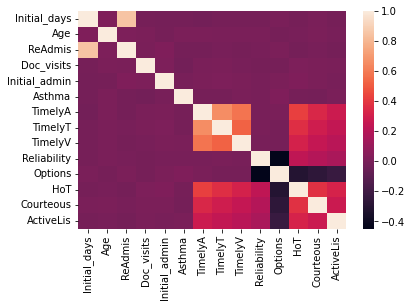

In [72]:
heatmap = df[['Initial_days', 'Age', 'ReAdmis', 'Doc_visits', 'Initial_admin', 'Asthma', 'TimelyA', 'TimelyT', 'TimelyV', 'Reliability', 'Options', 'HoT', 'Courteous', 'ActiveLis']]
sns.heatmap(heatmap.corr(), annot = False)
plt.show
heatmap.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

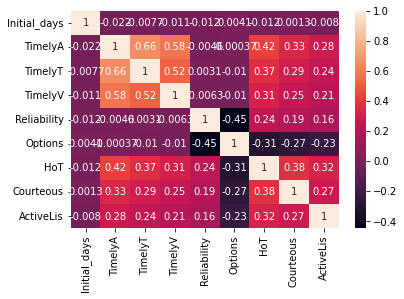

In [73]:
survey_heatmap = df[['Initial_days', 'TimelyA', 'TimelyT', 'TimelyV', 'Reliability', 'Options', 'HoT', 'Courteous', 'ActiveLis']]
sns.heatmap(survey_heatmap.corr(), annot = True)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

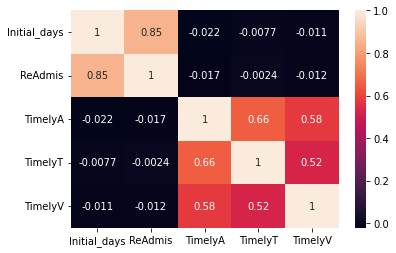

In [74]:
survey_heatmap = df[['Initial_days', 'ReAdmis', 'TimelyA', 'TimelyT', 'TimelyV']]
sns.heatmap(survey_heatmap.corr(), annot = True)
plt.show


In [78]:
#Reduced multiple regression model
df['intercept'] = 1
survey_model = sm.OLS(df['Initial_days'],df[['TimelyA', 'TimelyT', 'TimelyV','intercept']]).fit()
print(survey_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.927
Date:                Sun, 23 Oct 2022   Prob (F-statistic):              0.123
Time:                        22:52:28   Log-Likelihood:                -46885.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9996   BIC:                         9.381e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TimelyA       -0.7748      0.363     -2.133      0.0